# IBM Quantum Experience Lab - Lab script

Please use this notebook as a template for the work that you will submit for assessment for this lab exercise.

Student Names: Parth Bhandari
               Sheila Perez 
               Charlie Solomons-Tuke

## Warm up exercise

In [6]:
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit import execute, Aer
import numpy as np

In [7]:
qr = QuantumRegister(1)
cr = ClassicalRegister(1)

circuit = QuantumCircuit(qr, cr)

circuit.h(qr[0])
circuit.measure(qr[0],cr[0])

backend = Aer.get_backend('qasm_simulator')

exponent = np.arange(2,20,1) # 2^25 iterations is as much as I can calulate in a reasonable amound of time.
expectation = []
for s in [2**n for n in exponent]:
    job = execute(circuit, backend, shots=s)
    result=job.result().get_counts(circuit)
    expectation.append((result['0']-result['1'])/(result['0']+result['1']))

Text(0.5, 0, 'log2(number of itterations)')

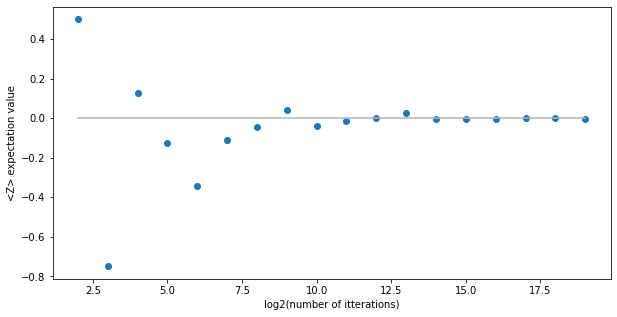

In [10]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot()
ax.scatter(exponent, expectation)
ax.plot(exponent, exponent*0, c=(0.7,.7,0.7))
ax.set_ylabel('<Z> expectation value')
ax.set_xlabel('log2(number of itterations)')

## Main exercise

First, create our registers:

In [2]:
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit import execute, Aer
import numpy as np

In [3]:
qr = QuantumRegister(1)
cr = ClassicalRegister(1)
backend = Aer.get_backend('qasm_simulator')

$$\newcommand{\ket}[1]{\left|{#1}\right\rangle}$$

### Pair 1:  𝜃=𝜋/4,  𝜙=0

When $\phi=0$ the state is simply $\ket{0}$.

For $\theta = \pi /4$, the observable in question is

$$ M(\pi/4) = \begin{bmatrix} 0 & \frac{1-i}{\sqrt{2}} \\ \frac{1+i}{\sqrt{2}} & 0
\end{bmatrix} = T X T^\dagger$$

### Method 2

We use the identity $M(\pi/4) = \frac{1}{\sqrt{2}} X + Y $, then estimate X and Y independently.

In [11]:
xcircuit = QuantumCircuit(qr, cr)
xcircuit.h(qr[0])
xcircuit.measure(qr[0],cr[0])
job = execute(xcircuit, backend, shots=1024)
result=job.result().get_counts(xcircuit)
x = (result['0']-result['1'])/(result['0']+result['1'])
